In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import scipy.stats as st

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import *

pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.display.float_format='{:06f}'.format

from warnings import filterwarnings
filterwarnings('ignore')

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
ai = pd.read_csv(r'C:\Users\user\Desktop\Capstone Final\Data\Asia_Data.csv')

cols = ['Unnamed: 0',
        'Adjusted_savings_natural_resources_depletion_pct_of_GNI',
         'Adjusted_savings_net_forest_depletion_pct_of_GNI',
         'Agricultural_land_pct_of_land_area',
         'Agriculture_forestry_and_fishing_value_added_pct_of_GDP',
         'CO2_emissions_metric_tons_per_capita',
         'Electricity_production_from_coal_sources_pct_of_total',
         'Energy_imports_net_pct_of_energy_use', 
         'Energy_use_kg_of_oil_equivalent_per_capita',
         'Fossil_fuel_energy_consumption_pct_of_total',
         'GDP_growth_annual_pct',
         'Methane_emissions_metric_tons_of_CO2_equivalent_per_capita',
         'Nitrous_oxide_emissions_metric_tons_of_CO2_equivalent_per_capita',
         'Population_density_people_per_sqkm_of_land_area',
         'Annual_CO2_emissions',
         'Share_of_global_CO2_emissions',
         'Consumption_based_tonnes',
         'Production_based_tonnes',
         'Cement_tonnes',
         'Flaring_tonnes',
         'Oil_tonnes',
         'Coal_tonnes',
         'Gas_tonnes',
         'Per_capita_energy_use_kWh',
         'Share_of_population_living_in_extreme_poverty_pct',
         'GDP_per_capita_international_USD_constant_2011_international_USD',
         'Emission_intensity_kg_per_2011_PPP_USD_of_GDP',
         'Mean_Temp',
         'Mean_Rain',
         'Time',
         'Country_Code',
         'Country_Name',
         'Continent',
         'Continent_code']

ai.columns = cols
ai.head()

,Unnamed: 0,Adjusted_savings_natural_resources_depletion_pct_of_GNI,Adjusted_savings_net_forest_depletion_pct_of_GNI,Agricultural_land_pct_of_land_area,Agriculture_forestry_and_fishing_value_added_pct_of_GDP,CO2_emissions_metric_tons_per_capita,Electricity_production_from_coal_sources_pct_of_total,Energy_imports_net_pct_of_energy_use,Energy_use_kg_of_oil_equivalent_per_capita,Fossil_fuel_energy_consumption_pct_of_total,GDP_growth_annual_pct,Methane_emissions_metric_tons_of_CO2_equivalent_per_capita,Nitrous_oxide_emissions_metric_tons_of_CO2_equivalent_per_capita,Population_density_people_per_sqkm_of_land_area,Annual_CO2_emissions,Share_of_global_CO2_emissions,Consumption_based_tonnes,Production_based_tonnes,Cement_tonnes,Flaring_tonnes,Oil_tonnes,Coal_tonnes,Gas_tonnes,Per_capita_energy_use_kWh,Share_of_population_living_in_extreme_poverty_pct,GDP_per_capita_international_USD_constant_2011_international_USD,Emission_intensity_kg_per_2011_PPP_USD_of_GDP,Mean_Temp,Mean_Rain,Time,Country_Code,Country_Name,Continent,Continent_code
0,1,14.988529,0.827532,57.745918,26.729670,0.053589,0.000000,100.000000,281.771718,61.952267,8.137448,1.247441,0.646881,14.044987,490797.700000,0.005200,0,490797.700000,21806.000000,0.000000,293120.000000,175870.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.968494,28.293619,1961,AFG,Afghanistan,Asia,AS
1,2,14.359859,1.509706,2.928752,22.929527,0.109141,18.871147,-499.196572,2213.759327,61.773290,4.412573,3.811538,0.700569,1.419262,10992.000000,0.000100,0,10992.000000,0.000000,0.000000,10992.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.768617,4.872225,1961,ARE,United Arab Emirates,Asia,AS
2,3,10.321161,0.728357,75.810053,32.909950,0.226812,0.000000,-363.066418,274.359698,45.479451,-3.755069,0.624707,0.217436,68.194310,2571441.540000,0.027200,0,2571441.540000,105820.000000,0.000000,5096300.000000,1095600.000000,1133900.000000,0.000000,0.000000,0.000000,0.000000,7.844107,28.217125,1961,ARM,Armenia,Asia,AS
3,4,5.610840,0.001555,60.941342,24.611552,2.615422,0.000000,-0.373318,322.736917,93.945021,8.619266,0.825166,0.151258,48.431474,24828176.700000,0.262700,0,24828176.700000,213600.000000,0.000000,14621300.000000,512410.000000,5889100.000000,0.000000,0.000000,0.000000,0.000000,12.452432,27.141233,1961,AZE,Azerbaijan,Asia,AS
4,5,0.422336,0.000000,72.827841,57.988236,0.319261,2.389937,98.713742,276.504731,46.728028,6.058161,1.498686,1.091323,379.218276,2290409.290000,0.024200,0,2290409.290000,5132.500000,0.000000,1411300.000000,714530.000000,159450.000000,0.000000,0.000000,0.000000,0.000000,24.978267,207.773552,1961,BGD,Bangladesh,Asia,AS


In [3]:
ai_c = pd.read_csv('ai_c_final.csv')
ai_n_new = pd.read_csv('ai_n_transformed.csv')

ai_c.drop('Unnamed: 0', axis=1, inplace=True)
ai_n_new.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
ai_n_new.head()

,Adjusted_savings_natural_resources_depletion_pct_of_GNI,Adjusted_savings_net_forest_depletion_pct_of_GNI,Agricultural_land_pct_of_land_area,Agriculture_forestry_and_fishing_value_added_pct_of_GDP,CO2_emissions_metric_tons_per_capita,Electricity_production_from_coal_sources_pct_of_total,Energy_imports_net_pct_of_energy_use,Energy_use_kg_of_oil_equivalent_per_capita,Fossil_fuel_energy_consumption_pct_of_total,GDP_growth_annual_pct,Methane_emissions_metric_tons_of_CO2_equivalent_per_capita,Nitrous_oxide_emissions_metric_tons_of_CO2_equivalent_per_capita,Population_density_people_per_sqkm_of_land_area,Annual_CO2_emissions,Share_of_global_CO2_emissions,Consumption_based_tonnes,Production_based_tonnes,Cement_tonnes,Flaring_tonnes,Oil_tonnes,Coal_tonnes,Gas_tonnes,Per_capita_energy_use_kWh,Share_of_population_living_in_extreme_poverty_pct,GDP_per_capita_international_USD_constant_2011_international_USD,Emission_intensity_kg_per_2011_PPP_USD_of_GDP,Mean_Temp,Mean_Rain,Time
0,1.206095,1.496638,0.951570,0.659316,-1.414285,-0.766812,1.642149,-1.086351,-0.396566,0.298908,-0.042803,0.919099,-0.925236,-1.462383,-0.981367,-0.752706,-1.462383,-0.730312,-0.835127,-1.413081,0.160395,-1.417996,-0.341735,-0.333393,-0.940720,-0.813666,-0.827173,-0.391854,1961
1,1.177125,1.746818,-1.735486,0.456379,-1.336022,1.371956,-0.825787,0.647561,-0.402547,-0.139148,1.082678,1.017781,-2.218333,-2.709714,-1.019485,-0.752706,-2.709714,-1.837208,-0.835127,-2.401410,-1.328850,-1.417996,-0.341735,-0.333393,-0.940720,-0.813666,0.988825,-1.559791,1961
2,0.949495,1.420462,1.423568,0.958151,-1.186496,-0.766812,-0.693360,-1.111856,-0.924893,-1.099537,-0.782750,-0.585592,0.080021,-0.852487,-0.824307,-0.752706,-0.852487,-0.388184,-0.835127,-0.326946,0.446844,0.130510,-0.341735,-0.333393,-0.940720,-0.813666,-1.376173,-0.393895,1961
3,0.514858,-0.748922,1.040645,0.548300,0.123104,-0.766812,-0.174055,-0.957783,0.744012,0.355572,-0.494454,-1.026316,-0.135987,0.055067,0.321656,-0.752706,0.055067,-0.212558,-0.835127,0.137706,0.325589,0.480956,-0.341735,-0.333393,-0.940720,-0.813666,-0.886188,-0.423133,1961
4,-0.998514,-0.761911,1.350463,1.928686,-1.082001,0.586175,1.612150,-1.104396,-0.886522,0.054375,0.159110,1.483589,1.128075,-0.896512,-0.845044,-0.752706,-0.896512,-0.988761,-0.835127,-0.844709,0.378241,-0.223152,-0.341735,-0.333393,-0.940720,-0.813666,0.730723,1.285976,1961


In [5]:
retaining_years = [1977, 1983, 1984, 1985, 1987, 1988]
retaining_years.extend(range(1990,2017))

In [6]:
ai_n_new_and_country = pd.concat([ai_n_new, ai_c], axis=1)

In [7]:
df_final = pd.DataFrame()

In [8]:
for i in retaining_years:
    df_final = pd.concat([df_final, ai_n_new_and_country[ai_n_new_and_country['Time']==i]], axis=0)

In [9]:
df_final = df_final[~((df_final['Country_Name']=='China') | (df_final['Country_Name']=='Brunei Darussalum') | (df_final['Country_Name']=='Qatar') | (df_final['Time']=='2011') | (df_final['Time']=='2012') | (df_final['Time']=='2013') | (df_final['Time']=='2014') | (df_final['Time']=='2015') | (df_final['Time']=='2016'))]

---

# CLUSTERING

In [10]:
data = df_final.set_index(keys=['Country_Name','Time'], inplace=False, drop=True)

In [11]:
data.head()

,,Adjusted_savings_natural_resources_depletion_pct_of_GNI,Adjusted_savings_net_forest_depletion_pct_of_GNI,Agricultural_land_pct_of_land_area,Agriculture_forestry_and_fishing_value_added_pct_of_GDP,CO2_emissions_metric_tons_per_capita,Electricity_production_from_coal_sources_pct_of_total,Energy_imports_net_pct_of_energy_use,Energy_use_kg_of_oil_equivalent_per_capita,Fossil_fuel_energy_consumption_pct_of_total,GDP_growth_annual_pct,Methane_emissions_metric_tons_of_CO2_equivalent_per_capita,Nitrous_oxide_emissions_metric_tons_of_CO2_equivalent_per_capita,Population_density_people_per_sqkm_of_land_area,Annual_CO2_emissions,Share_of_global_CO2_emissions,Consumption_based_tonnes,Production_based_tonnes,Cement_tonnes,Flaring_tonnes,Oil_tonnes,Coal_tonnes,Gas_tonnes,Per_capita_energy_use_kWh,Share_of_population_living_in_extreme_poverty_pct,GDP_per_capita_international_USD_constant_2011_international_USD,Emission_intensity_kg_per_2011_PPP_USD_of_GDP,Mean_Temp,Mean_Rain
Country_Name,Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1977,-0.678958,0.467893,0.966707,1.186339,-1.241656,-0.766812,0.869866,-1.546650,-0.623109,0.223315,-0.535626,-0.409478,-0.694377,-0.880864,-0.924338,-0.752706,-0.880864,-0.492876,1.086969,-0.984802,0.305423,-0.020213,-0.341735,-0.333393,-0.940720,-0.813666,-0.765966,-0.507146
United Arab Emirates,1977,1.963420,-0.761911,-1.718440,-1.696951,1.858172,-0.766812,-2.136400,1.289688,0.974159,1.863344,2.124483,0.500919,-1.117903,0.243719,0.134042,-0.752706,0.243719,-0.411084,1.399120,-0.158542,-1.328850,0.127025,-0.341735,-0.333393,-0.940720,-0.813666,1.069112,-1.341726
Armenia,1977,-0.466924,-0.752855,-0.165111,0.562688,-0.463138,0.771863,-0.311710,0.403362,-1.157692,-0.463526,-0.929771,-0.503102,0.340144,-0.552052,-0.802416,-0.752706,-0.552052,-0.145909,1.003528,0.000928,0.444675,0.383011,-0.341735,-0.333393,-0.940720,-0.813666,-1.465987,-0.061199
Azerbaijan,1977,-1.278642,-0.761911,1.533992,1.513319,0.542869,-0.766812,-0.880800,0.385672,-0.465478,0.203279,0.073815,0.253347,0.100516,0.382717,0.415397,-0.752706,0.382717,0.022897,1.077211,0.431886,0.303615,0.742503,-0.341735,-0.333393,-0.940720,-0.813666,-0.996263,-0.125823
Bangladesh,1977,-0.114372,1.830551,1.446351,1.610364,-1.377645,-0.766812,0.028329,-2.144596,-1.446471,-0.343712,-0.075971,-0.993194,1.361403,-0.536737,-0.794267,-0.752706,-0.536737,-0.336082,-0.835127,-0.475328,0.322349,0.196779,-0.341735,-0.333393,-0.940720,-0.813666,0.706614,1.243065


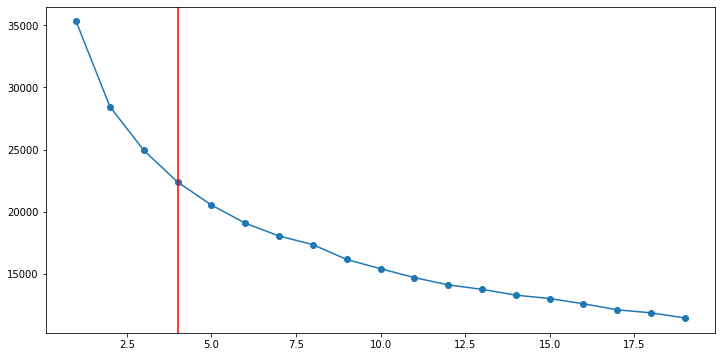

In [19]:
cluster_range = range( 1, 20)   
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(data)
  labels = clusters.labels_                     
  centroids = clusters.cluster_centers_ 
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.axvline(x=4,color='r')
plt.show()

In [17]:
from sklearn.metrics import silhouette_score

for i in range(2,8):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(data)
    labels = kmeans.predict(data)
    print(i,'---',silhouette_score(data, labels))

2 --- 0.18227751546110976
3 --- 0.18181830541854363
4 --- 0.1942610311880064
5 --- 0.1973451734111206
6 --- 0.18653928033763276
7 --- 0.1953632811226044


**Thus, with elbow and silhouette scores, we witness the optimal k-value is 4**

## K-means clustering without PCA (no. of clusters=4)

In [12]:
# for optimal k-value

kmeans = KMeans(n_clusters=4)

# Fitting the input data

kmeans = kmeans.fit(data)

# Getting the cluster labels

labels = kmeans.predict(data)

# Centroid values

centroids = kmeans.cluster_centers_

In [13]:
ai_labeled_without_PCA_k4 = pd.DataFrame(data.values, columns=data.columns)
ai_labeled_without_PCA_k4['Prediction'] = labels

## Clustering with PCA (no. of clusters=4)

In [14]:
pca = PCA(svd_solver='randomized', random_state=1)
pca.fit(data)

PCA(random_state=1, svd_solver='randomized')

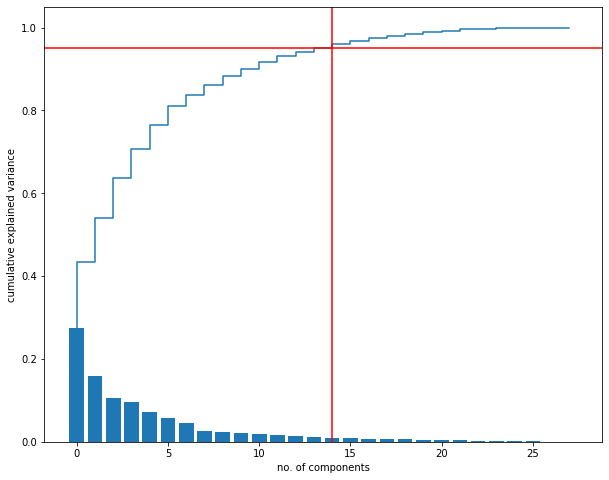

In [15]:
plt.figure(figsize=(10,8))
plt.step(y=np.cumsum(pca.explained_variance_ratio_), x=range(len(pca.explained_variance_ratio_)))
plt.bar(height=pca.explained_variance_ratio_, x=range(len(pca.explained_variance_ratio_)))
plt.xlabel('no. of components')
plt.ylabel('cumulative explained variance')
plt.axvline(x=14,color='r')
plt.axhline(y=.95,color='r')
plt.show()

In [16]:
# for optimal hyper-parameters

pca = PCA(n_components=14)
kmeans = KMeans(n_clusters=4)
pipe = Pipeline([('pca', pca), ('kmeans', kmeans)])

# Fitting the input data

pipe.fit(data)

labels = pipe.predict(data)

# Centroid values

centroids = pipe.named_steps['kmeans'].cluster_centers_

In [17]:
data_pc = pd.DataFrame(pca.fit_transform(data))

In [18]:
ai_labeled_with_PCA_k4 = pd.DataFrame(data_pc.values)
ai_labeled_with_PCA_k4['Prediction'] = labels

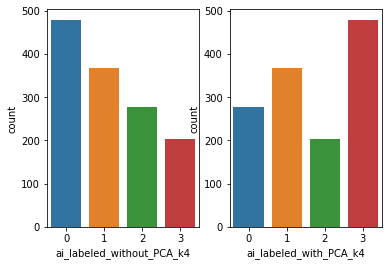

In [19]:
plt.subplot(1,2,1)
sns.countplot(ai_labeled_without_PCA_k4.Prediction)
plt.xlabel('ai_labeled_without_PCA_k4')
plt.subplot(1,2,2)
sns.countplot(ai_labeled_with_PCA_k4.Prediction)
plt.xlabel('ai_labeled_with_PCA_k4')
plt.show()

# Statistical Analysis

### For Clustered data without PCA ( where no. of Clusters=4)

In [20]:
x = ai_labeled_without_PCA_k4.drop('Prediction',axis=1)
y = ai_labeled_without_PCA_k4.Prediction

In [160]:
vif = pd.DataFrame()
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = variance_inflation_factor

vif['VIF_factors'] = [VIF(x.values, i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif.sort_values(by='VIF_factors', ascending=False)

,VIF_factors,Features
16,000inf,Production_based_tonnes
13,000inf,Annual_CO2_emissions
23,104.151389,Share_of_population_living_in_extreme_poverty_pct
22,103.790667,Per_capita_energy_use_kWh
19,25.613666,Oil_tonnes
4,15.851644,CO2_emissions_metric_tons_per_capita
14,10.996119,Share_of_global_CO2_emissions
7,8.843132,Energy_use_kg_of_oil_equivalent_per_capita
8,7.876023,Fossil_fuel_energy_consumption_pct_of_total
17,6.562175,Cement_tonnes


In [21]:
x1 = x.drop(['Production_based_tonnes','Share_of_population_living_in_extreme_poverty_pct','Annual_CO2_emissions',
            'CO2_emissions_metric_tons_per_capita', 'Oil_tonnes','Share_of_global_CO2_emissions'], axis=1)


vif = pd.DataFrame()
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = variance_inflation_factor

vif['VIF_factors'] = [VIF(x1.values, i) for i in range(x1.shape[1])]
vif['Features'] = x1.columns
vif.sort_values(by='VIF_factors', ascending=False)

,VIF_factors,Features
7,5.883515,Fossil_fuel_energy_consumption_pct_of_total
9,5.090760,Methane_emissions_metric_tons_of_CO2_equivalen...
6,4.916557,Energy_use_kg_of_oil_equivalent_per_capita
3,4.829365,Agriculture_forestry_and_fishing_value_added_p...
15,4.701557,Coal_tonnes
18,4.631231,GDP_per_capita_international_USD_constant_2011...
11,4.385491,Population_density_people_per_sqkm_of_land_area
19,3.561486,Emission_intensity_kg_per_2011_PPP_USD_of_GDP
13,3.468193,Cement_tonnes
0,3.419195,Adjusted_savings_natural_resources_depletion_p...


In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(x1, y, random_state=1, test_size=.20)

## Normality Check

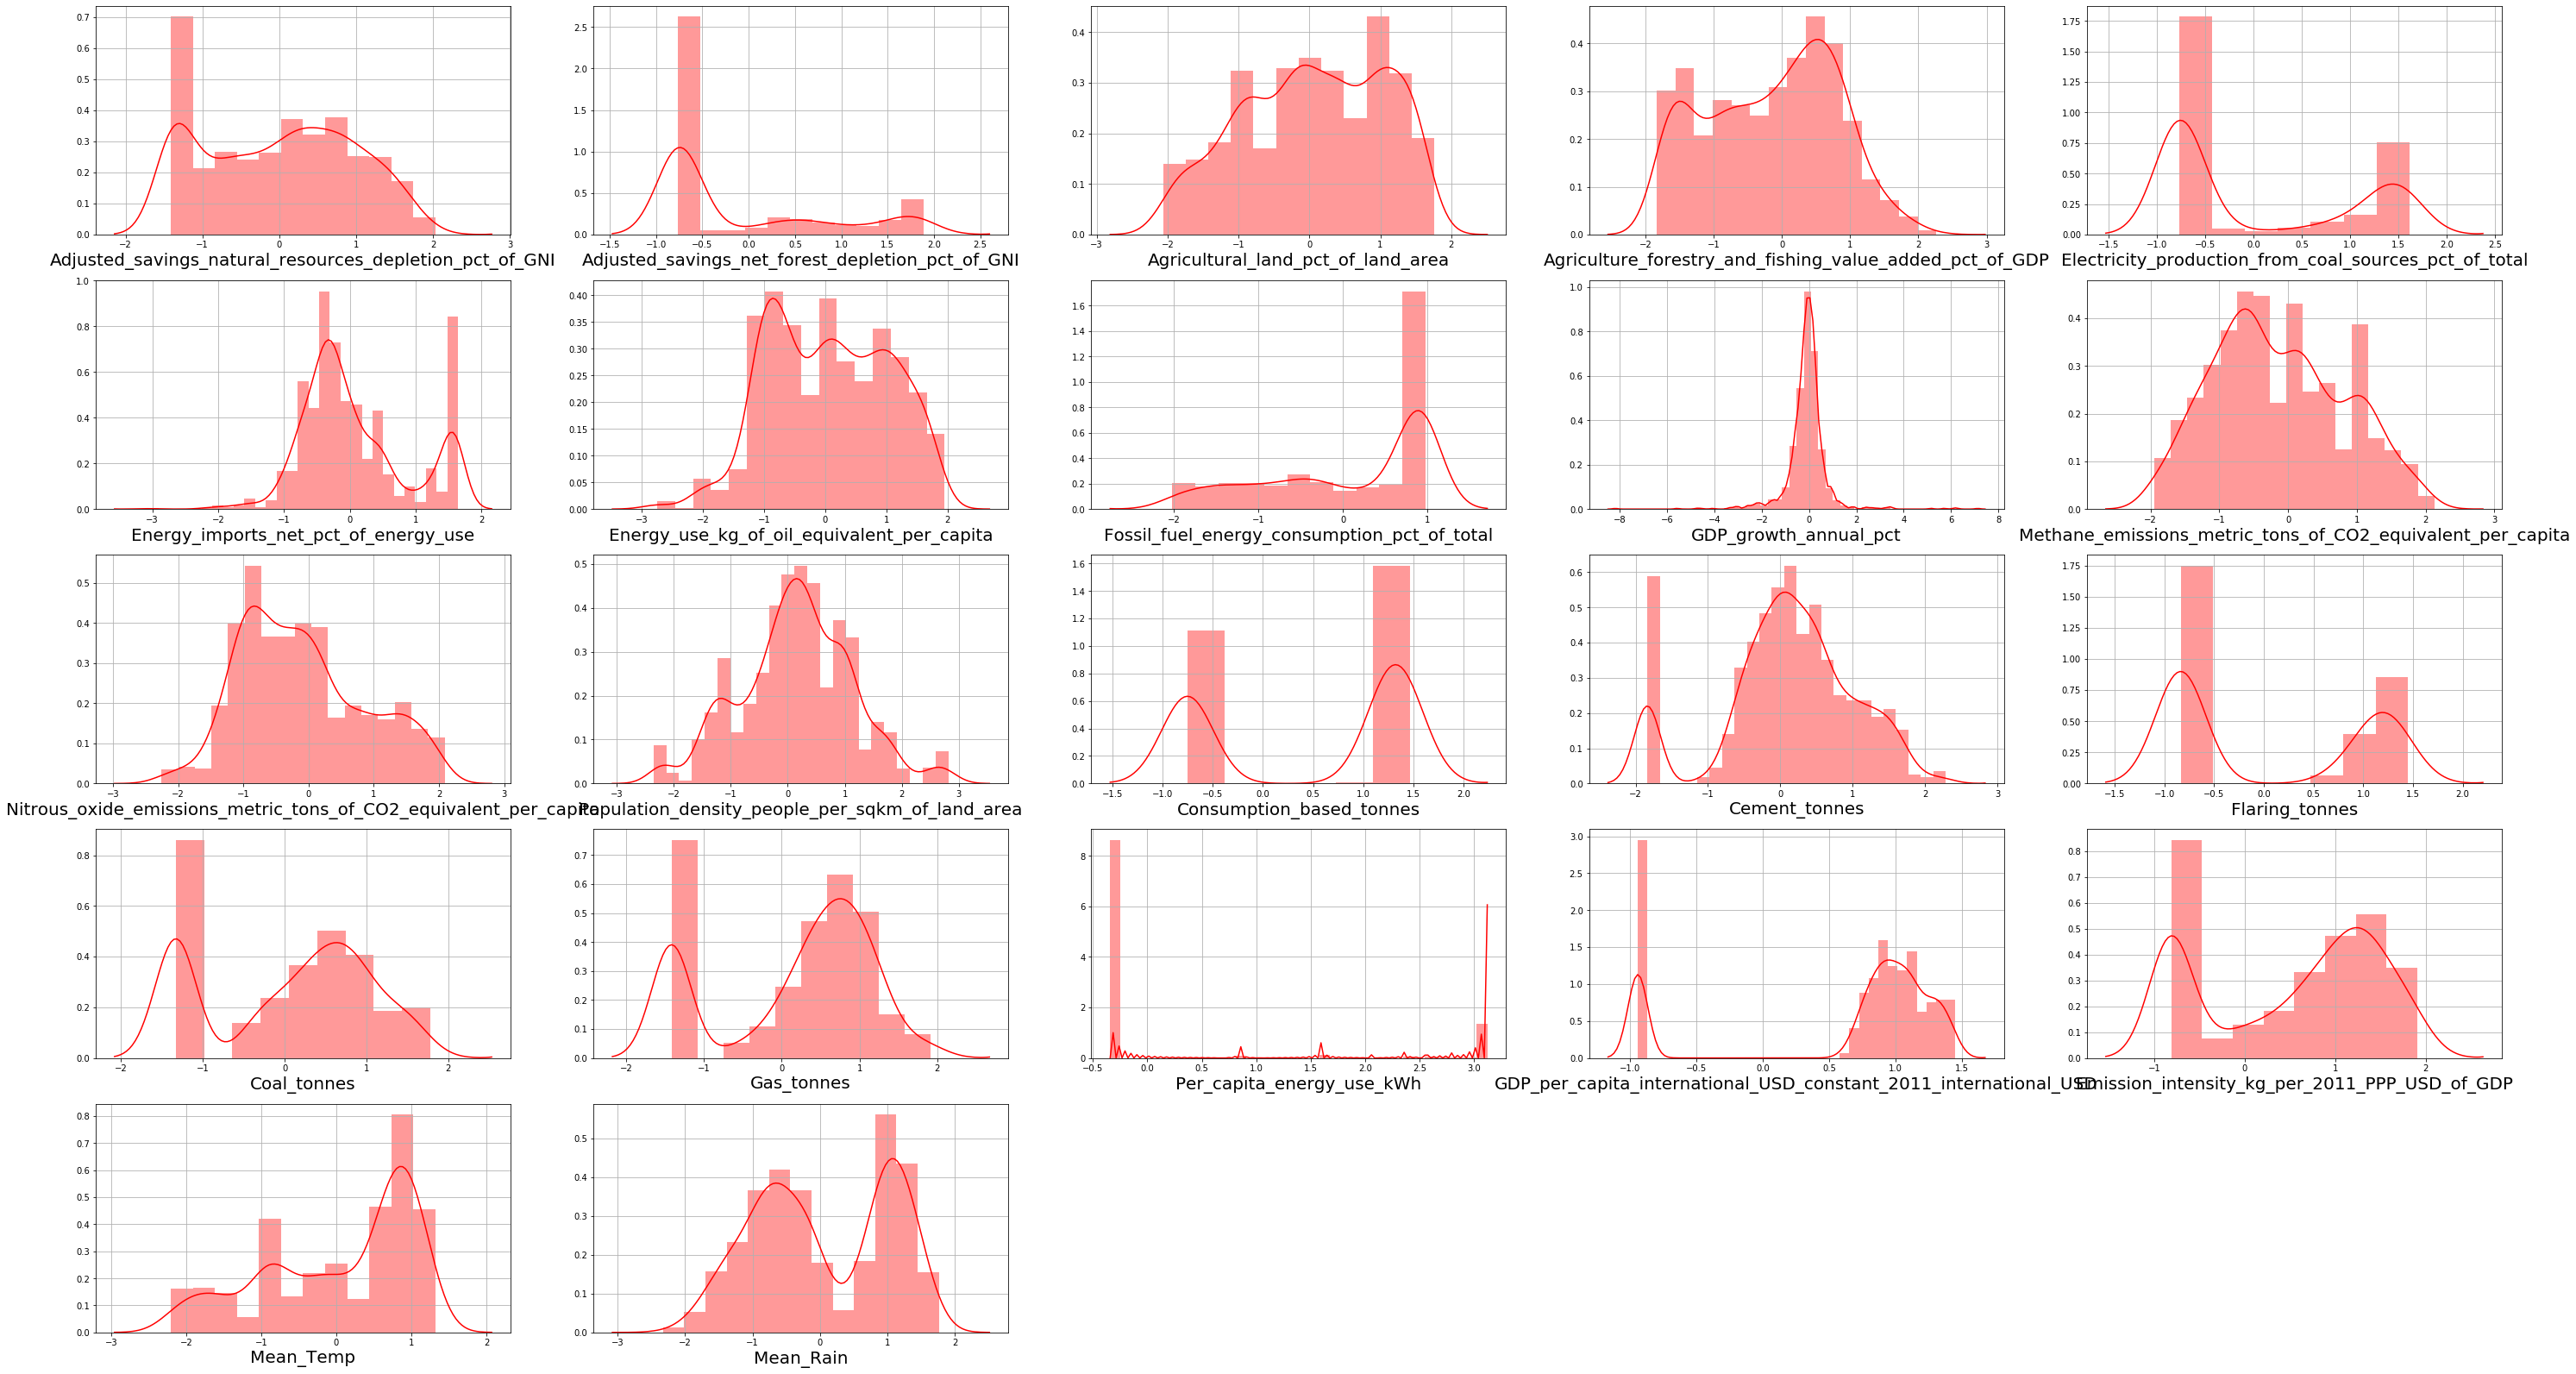

In [145]:
plt.figure(figsize=(50,40))
for i in enumerate(x1.columns):
    plt.subplot(7,5,i[0]+1)
    sns.distplot(x1[i[1]],color='r')
    plt.xlabel(i[1], fontsize=20)
    plt.grid()

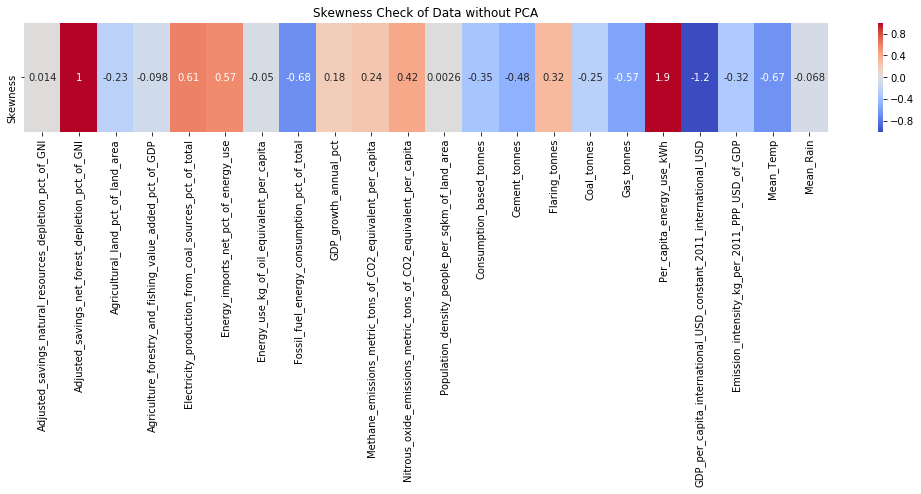

In [165]:
plt.figure(figsize=(18,2))
sns.heatmap(pd.DataFrame((x1.skew())).T, annot=True, xticklabels=x1.columns, yticklabels=['Skewness'], cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Skewness Check of Data without PCA')
plt.show()

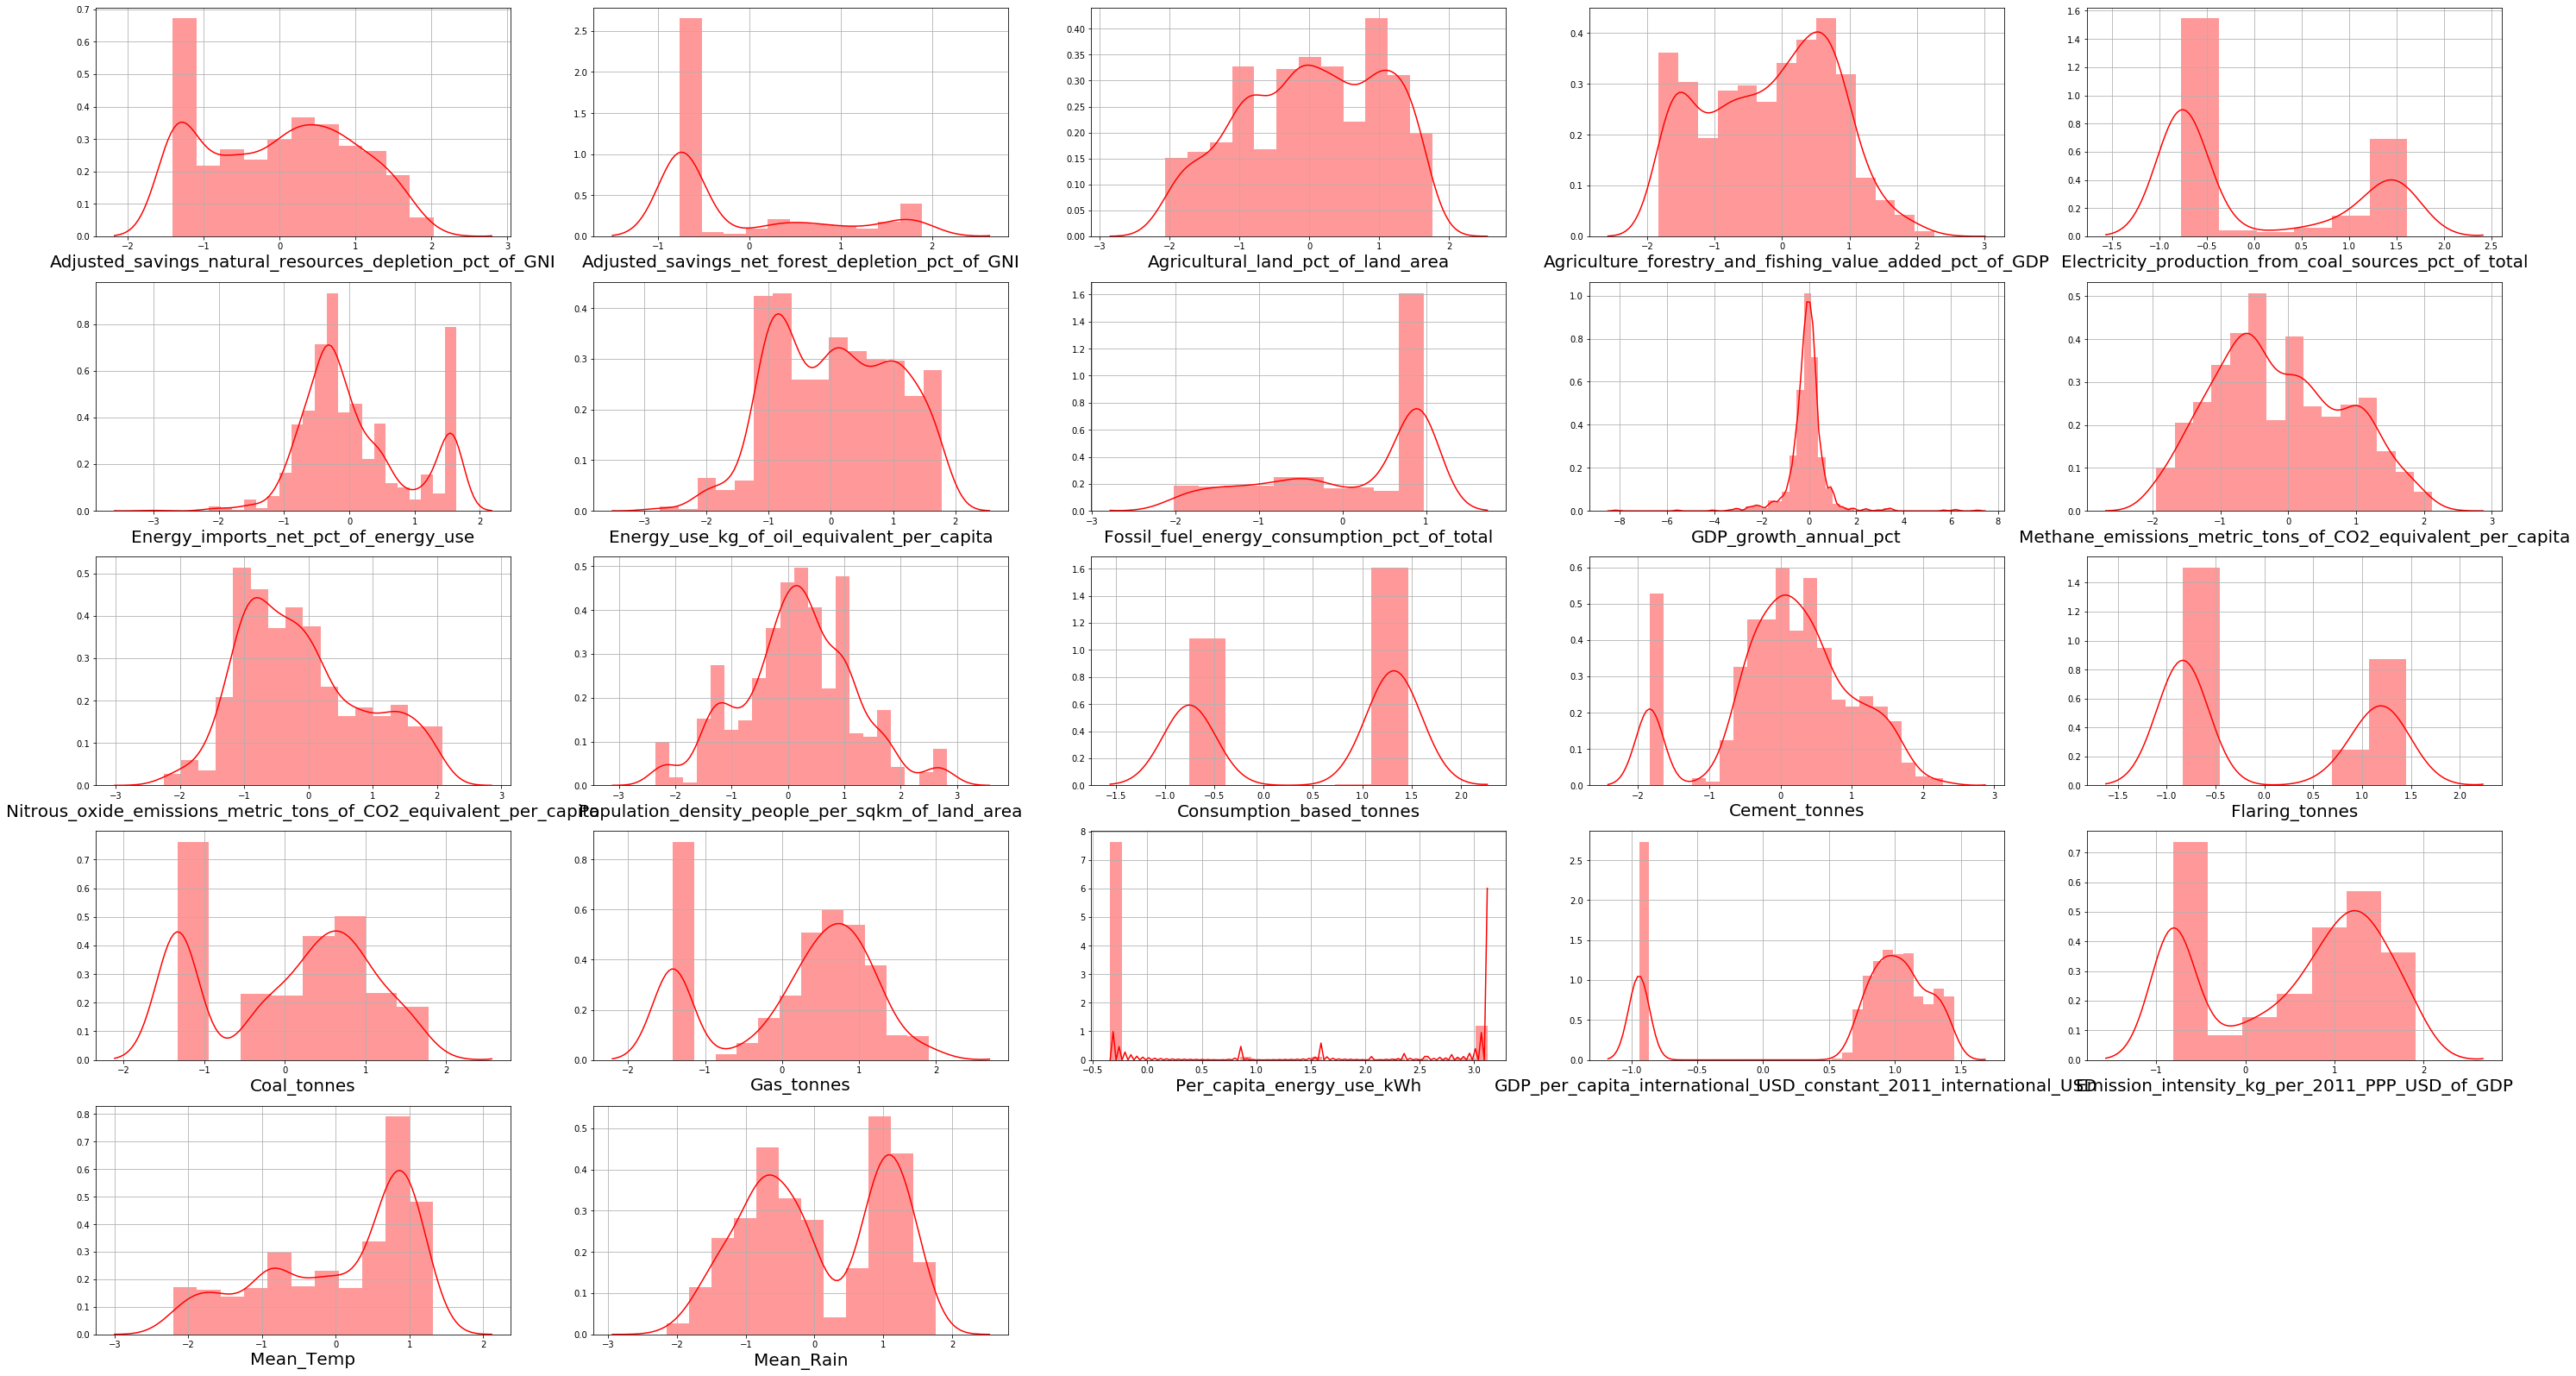

In [147]:
plt.figure(figsize=(50,40))
for i in enumerate(xtrain.columns):
    plt.subplot(7,5,i[0]+1)
    sns.distplot(xtrain[i[1]],color='r')
    plt.xlabel(i[1], fontsize=20)
    plt.grid()

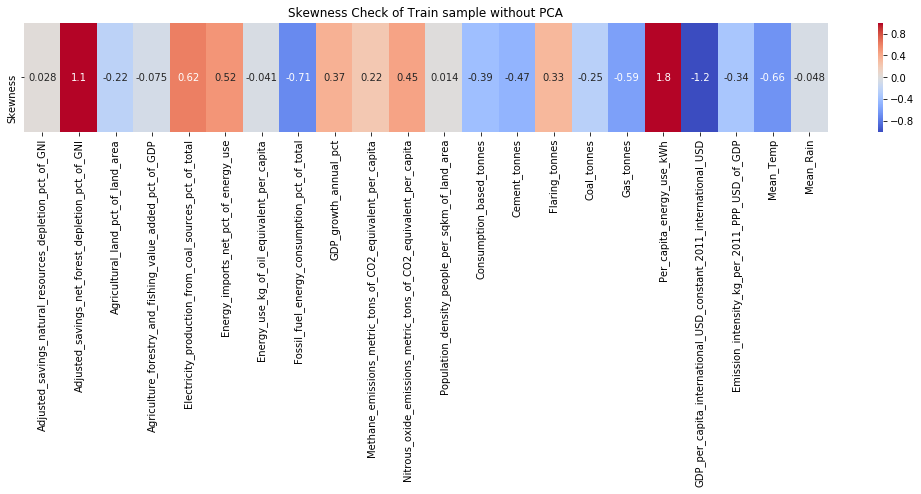

In [166]:
plt.figure(figsize=(18,2))
sns.heatmap(pd.DataFrame((xtrain.skew())).T, annot=True, xticklabels=xtrain.columns, yticklabels=['Skewness'], cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Skewness Check of Train sample without PCA')
plt.show()

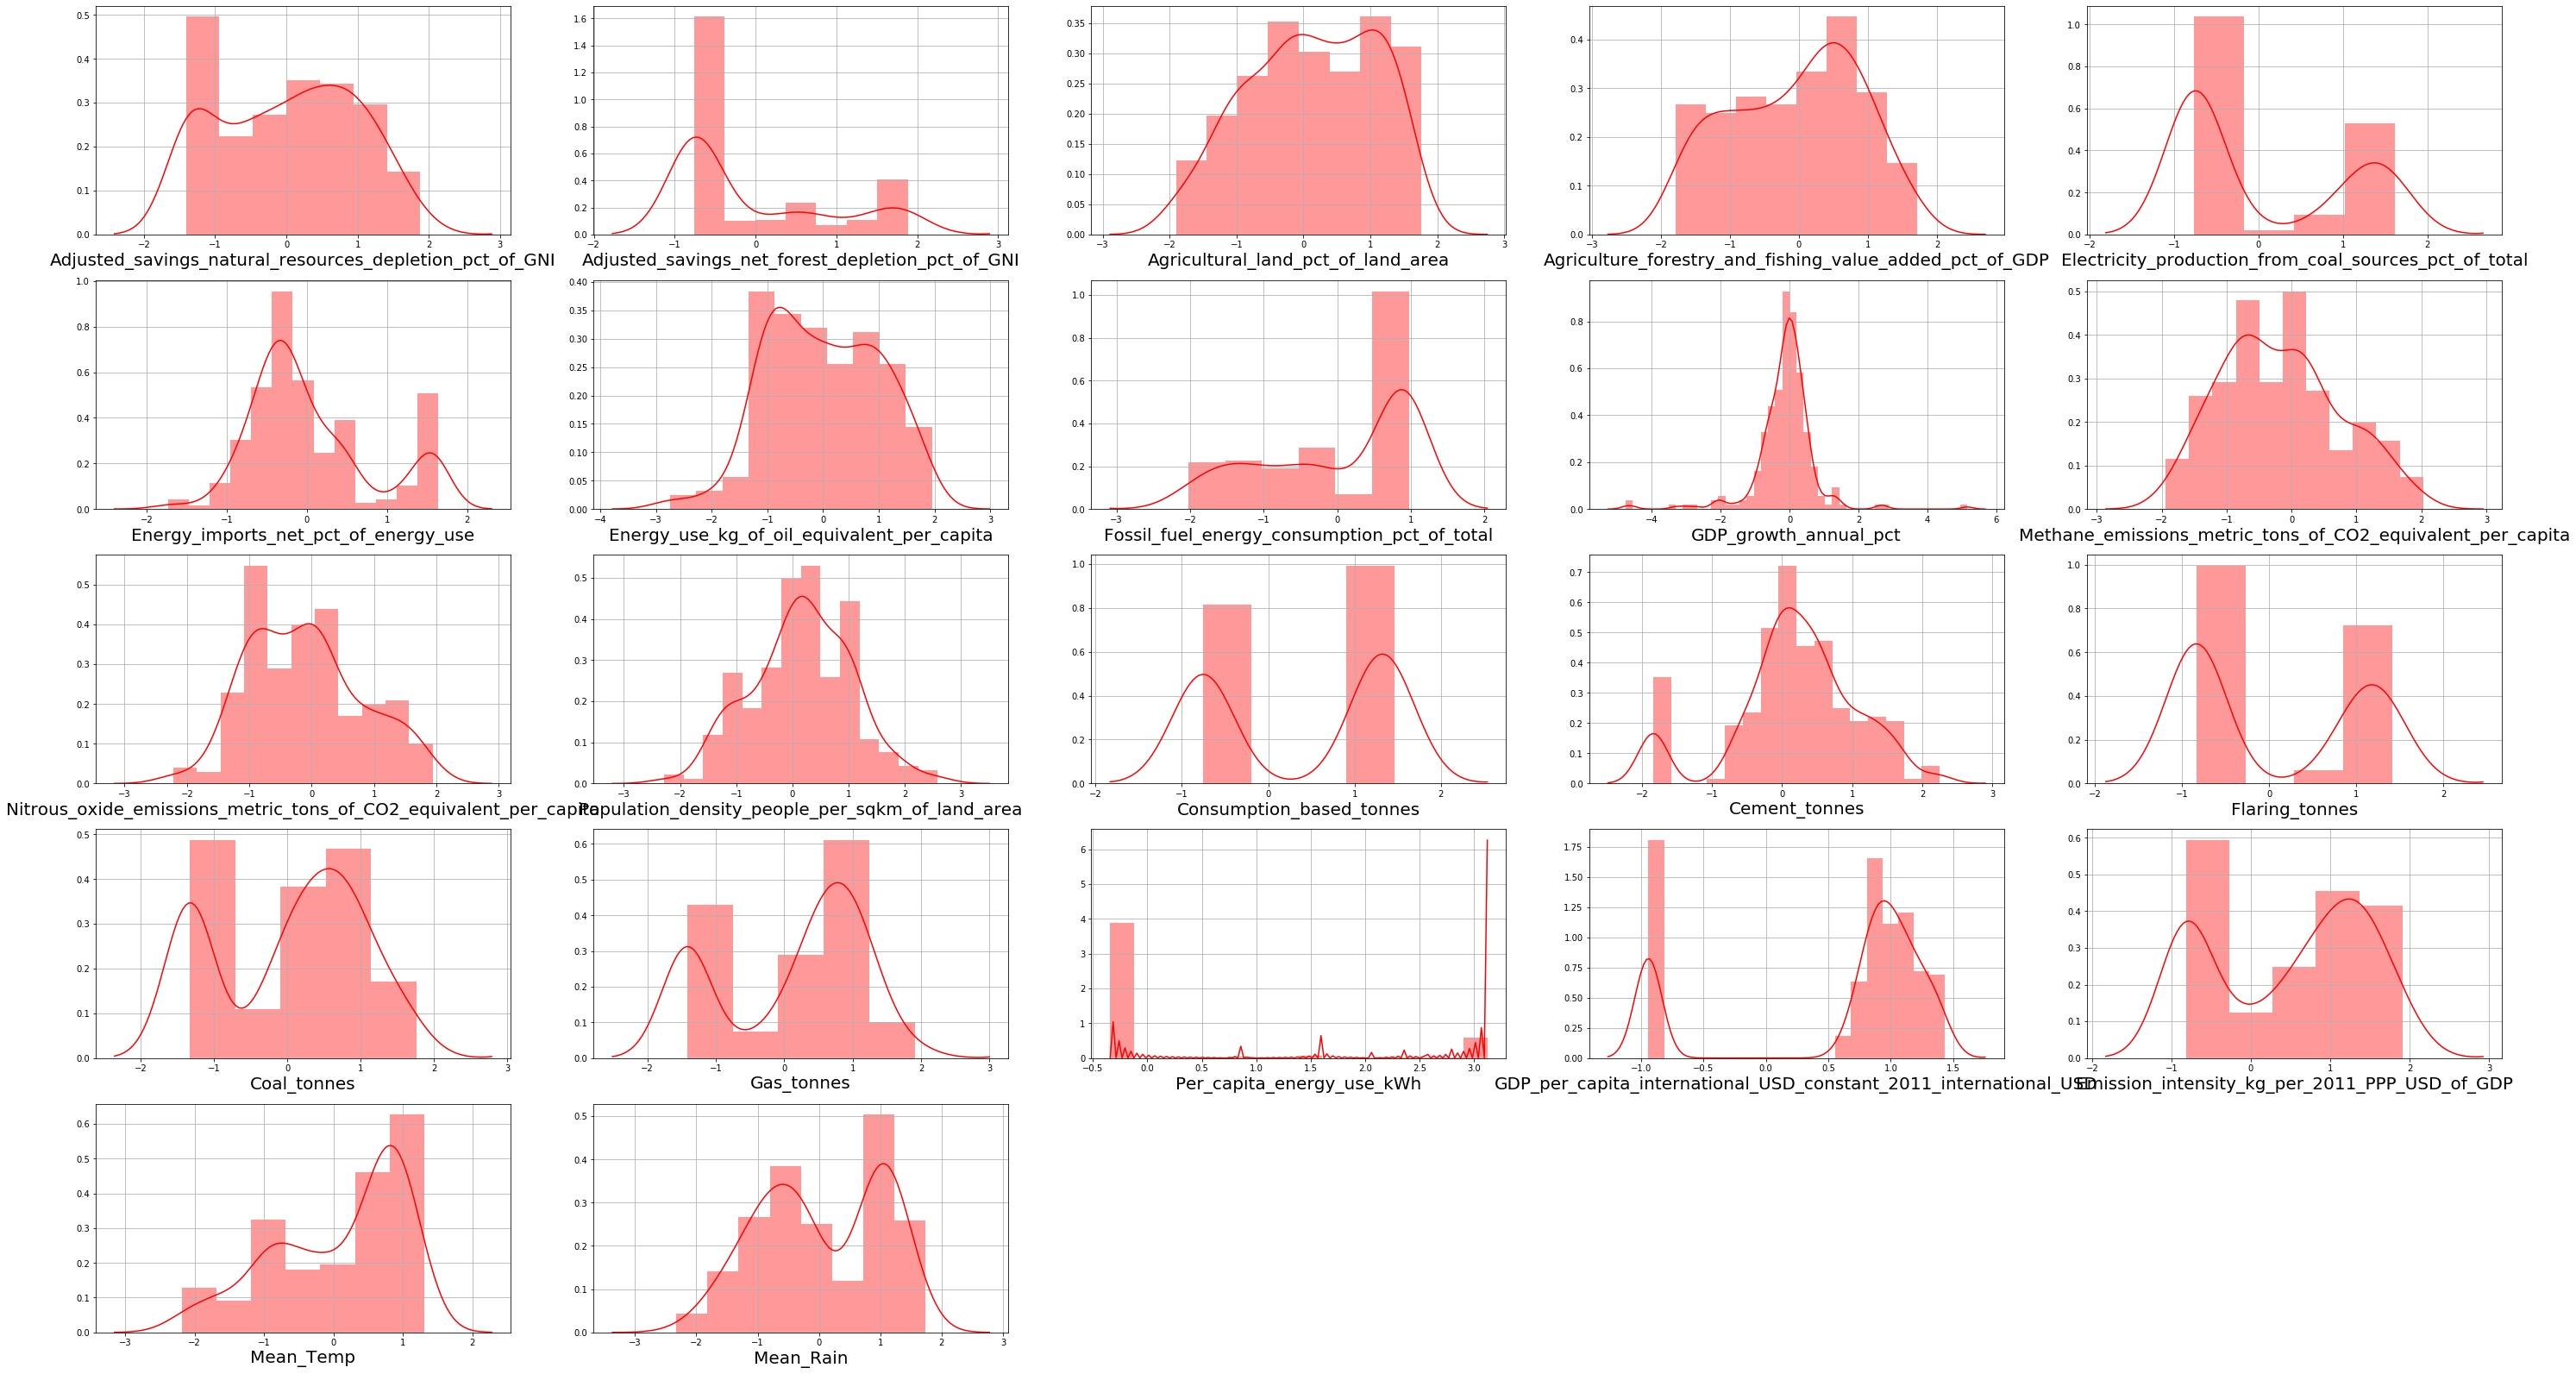

In [149]:
plt.figure(figsize=(50,40))
for i in enumerate(xtest.columns):
    plt.subplot(7,5,i[0]+1)
    sns.distplot(xtest[i[1]],color='r')
    plt.xlabel(i[1], fontsize=20)
    plt.grid()

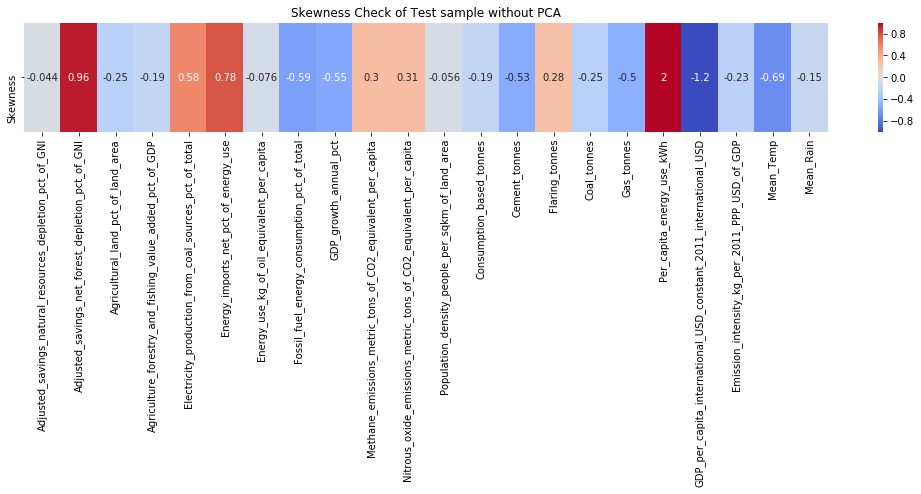

In [167]:
plt.figure(figsize=(18,2))
sns.heatmap(pd.DataFrame((xtest.skew())).T, annot=True, xticklabels=xtest.columns, yticklabels=['Skewness'], cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Skewness Check of Test sample without PCA')
plt.show()

**From the above graphs, we can conclude that most the features of original transformed data and its samples are normal, thus we can proceed to parametric methods for their statistical analysis, i.e, Anova in our case, for testing predictor significance and 1 sample t-test for testing train and test sample.**

## Analysing Significance of Predictors

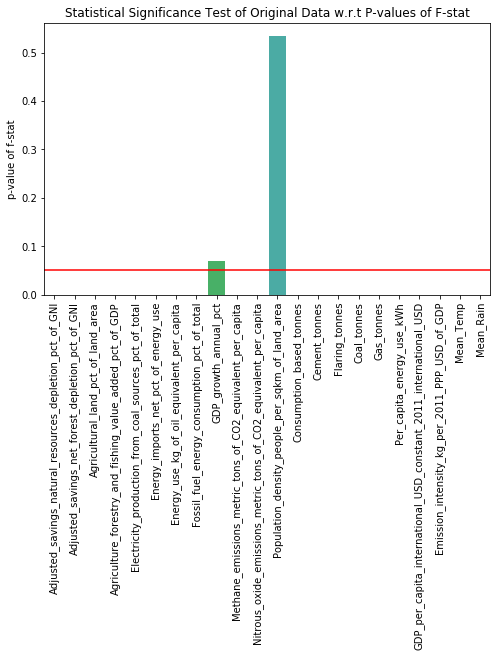

In [152]:
from sklearn.feature_selection import SelectKBest, f_classif

## HYPOTHESIS
# H0: Insignificant Features
# Ha: Significant Features

skb = SelectKBest(f_classif, k='all')
skb.fit_transform(x1,y)

data_pvals = pd.DataFrame(skb.pvalues_, index=x1.columns, columns=['p-value of f-stat'])

plt.figure(figsize=(8,5))
sns.barplot(y=data_pvals['p-value of f-stat'], x=data_pvals.index)
plt.title('Statistical Significance Test of Original Data w.r.t P-values of F-stat')
plt.axhline(y=0.05, color='r')
plt.xticks(rotation=90)
plt.show()

**As we can see, for features- 'GDP_growth_annual_pct' and 'Population_density_people_per_sqkm_of_land_area' we Fail to Reject Null Hypothesis, thus, infering them to be statistically insignificant features to determine variance in the target.**

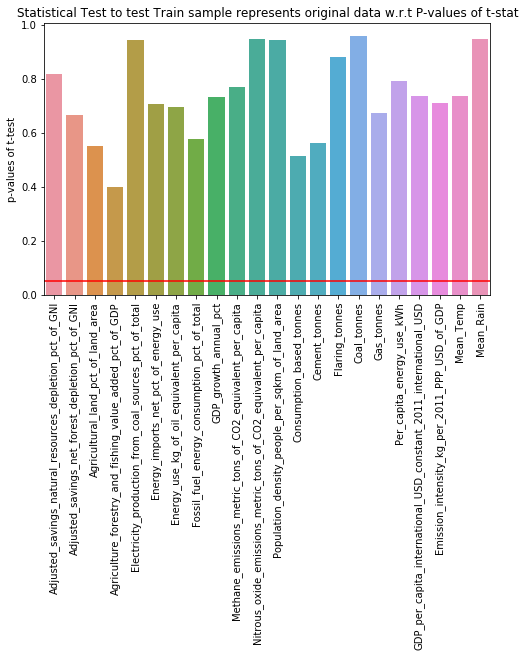

In [153]:
## HYPOTHESIS
# H0: train sample represents original data
# Ha: train sample varies from original data

data_train_pvals = pd.DataFrame(st.ttest_1samp(xtrain, x1.mean())[1], index=xtrain.columns, columns=['p-values of t-test'])

plt.figure(figsize=(8,5))
sns.barplot(y=data_train_pvals['p-values of t-test'], x=data_train_pvals.index)
plt.title('Statistical Test to test Train sample represents original data w.r.t P-values of t-stat')
plt.axhline(y=0.05, color='r')
plt.xticks(rotation=90)
plt.show()

**As we can see, for all the features we Fail to Reject Null Hypothesis, thus, infering the train sample to be representing the original data.**

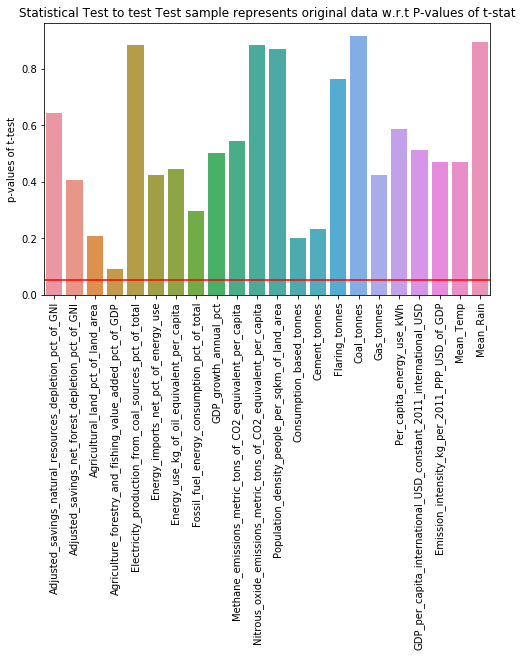

In [154]:
## HYPOTHESIS
# H0: train sample represents original data
# Ha: train sample varies from original data

data_test_pvals = pd.DataFrame(st.ttest_1samp(xtest, x1.mean())[1], index=xtrain.columns, columns=['p-values of t-test'])

plt.figure(figsize=(8,5))
sns.barplot(y=data_test_pvals['p-values of t-test'], x=data_test_pvals.index)
plt.title('Statistical Test to test Test sample represents original data w.r.t P-values of t-stat')
plt.axhline(y=0.05, color='r')
plt.xticks(rotation=90)
plt.show()

**As we can see, for all the features we Fail to Reject Null Hypothesis, thus, infering the test sample to be representing the original data.**

### For Clustered data with PCA ( where no. of Clusters=4)

In [23]:
x = ai_labeled_with_PCA_k4.drop('Prediction',axis=1)
y = ai_labeled_with_PCA_k4.Prediction

In [24]:
vif = pd.DataFrame()
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = variance_inflation_factor

vif['VIF_factors'] = [VIF(x.values, i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif.sort_values(by='VIF_factors', ascending=False)

,VIF_factors,Features
3,1.000000,3
11,1.000000,11
12,1.000000,12
0,1.000000,0
1,1.000000,1
4,1.000000,4
5,1.000000,5
8,1.000000,8
13,1.000000,13
2,1.000000,2


In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=1, test_size=.20)

## Normality Check

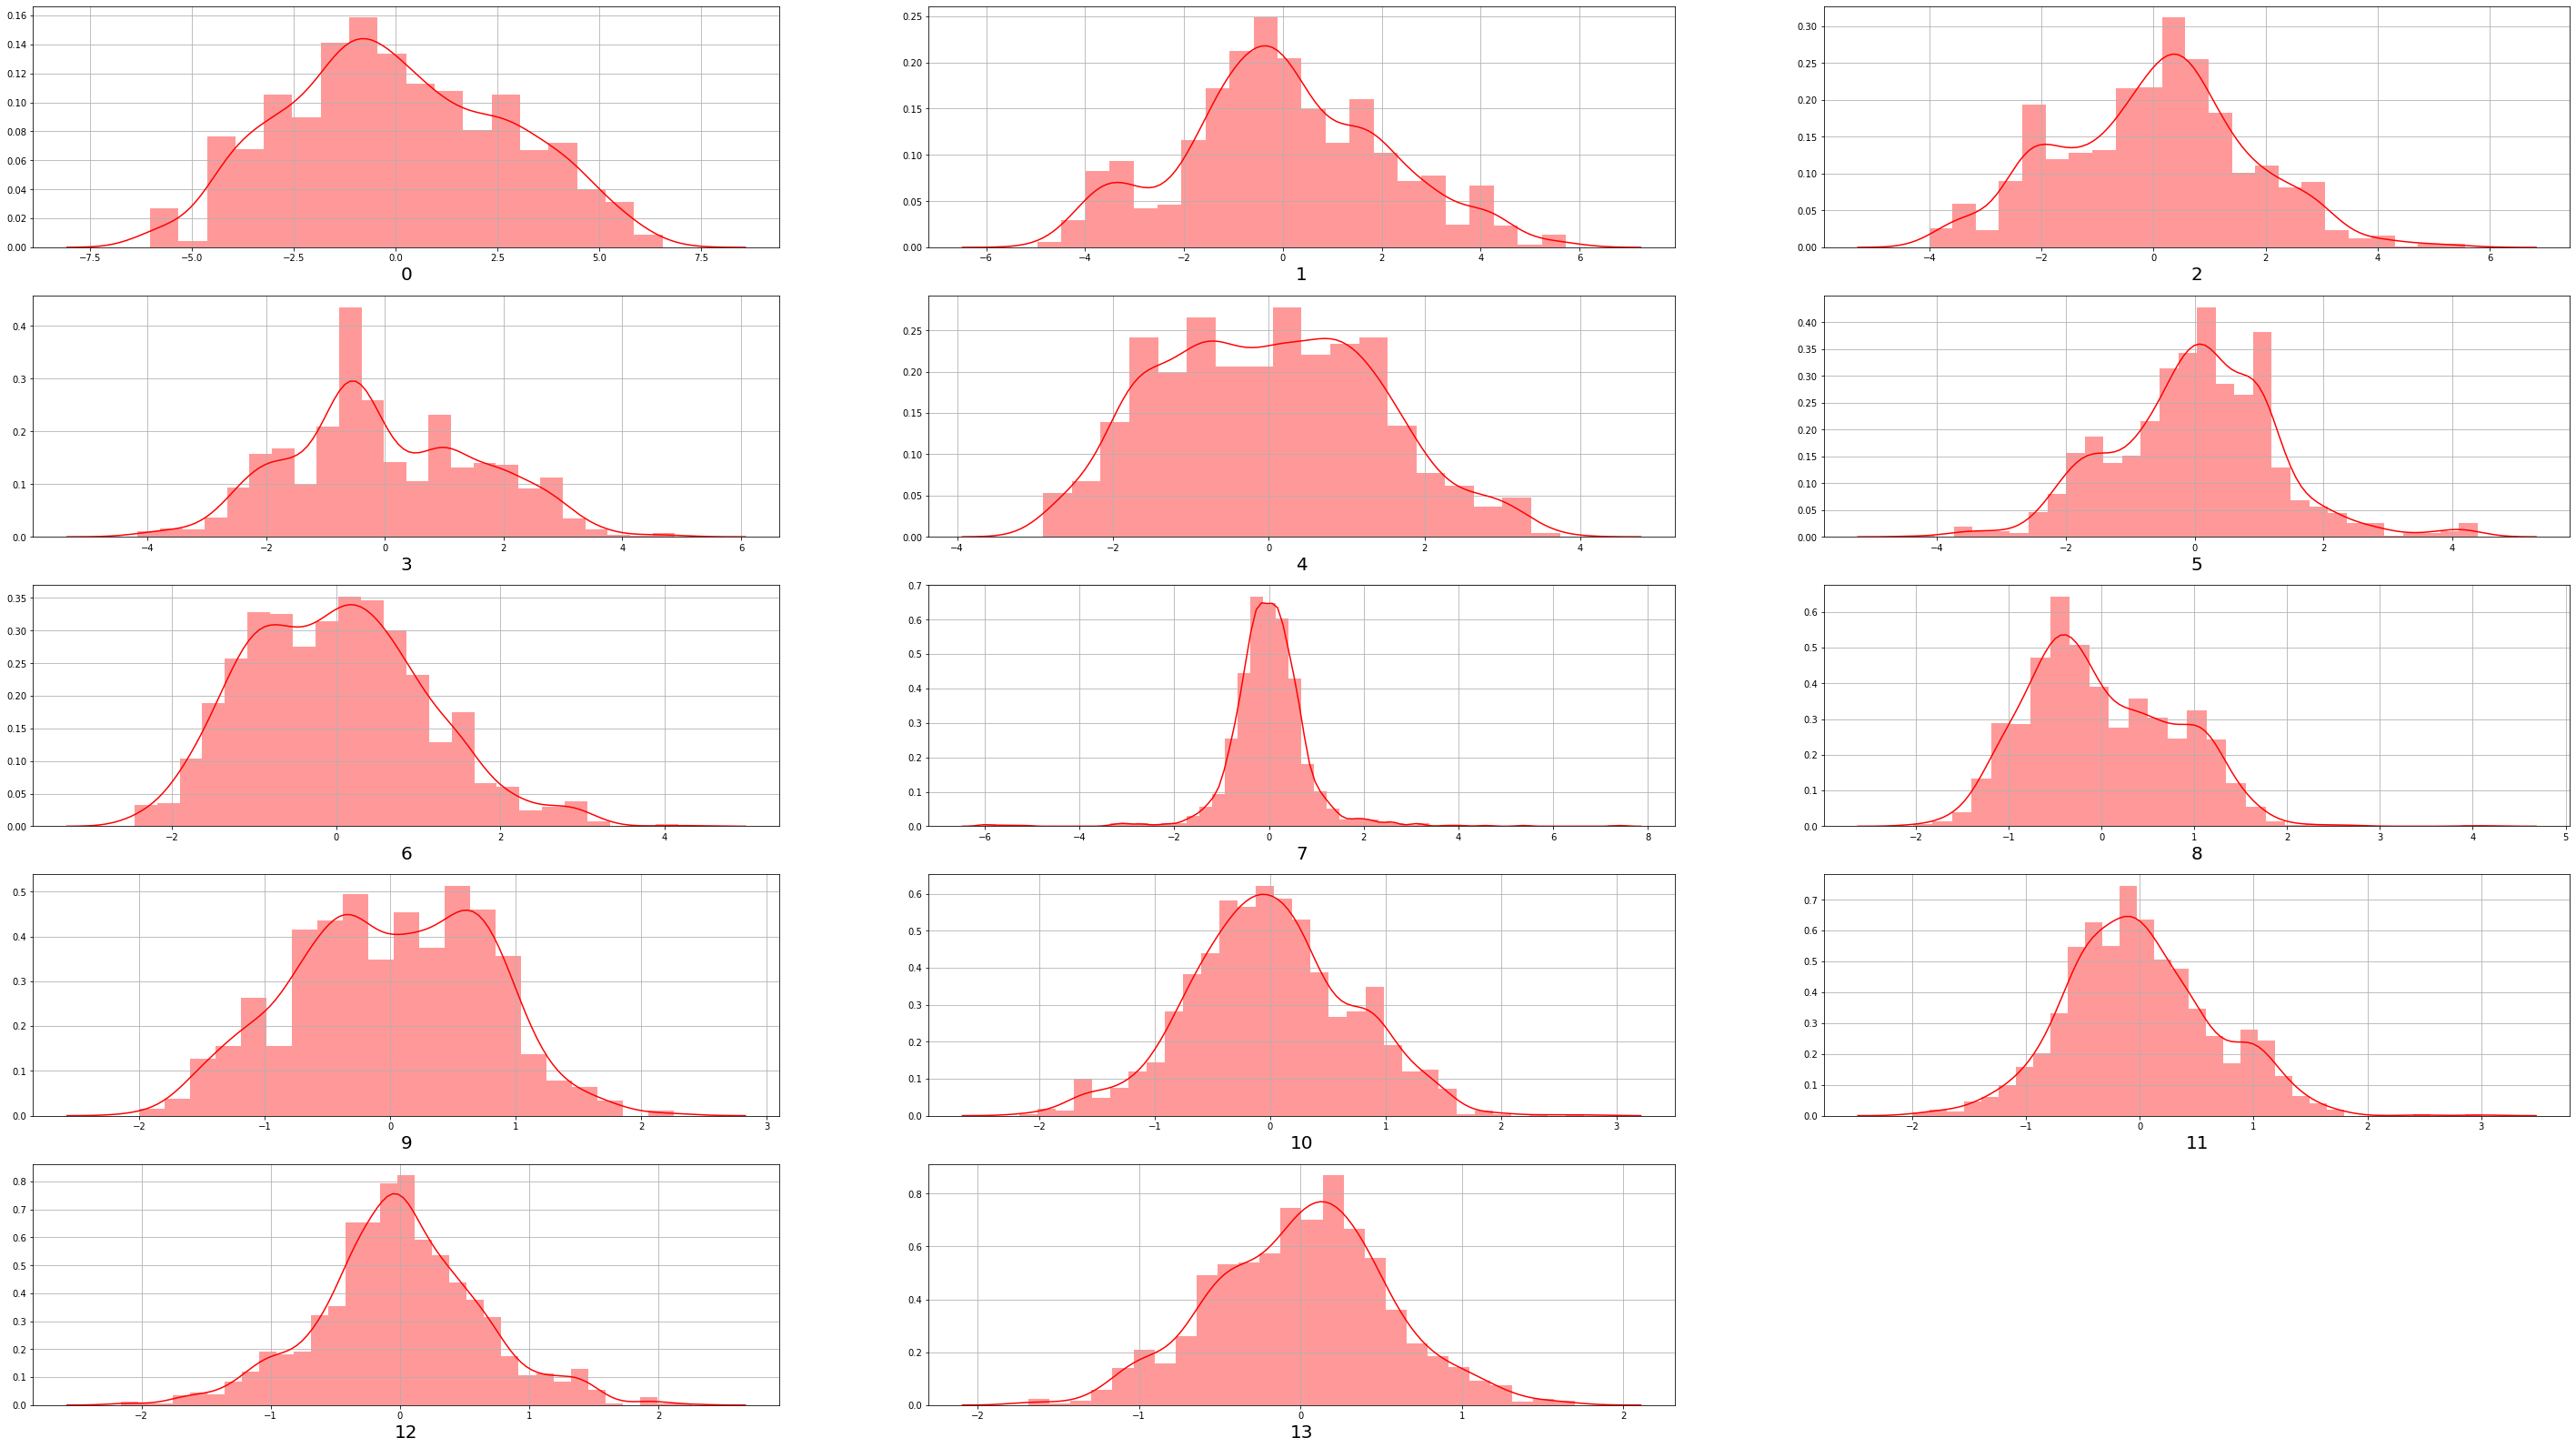

In [26]:
plt.figure(figsize=(50,40))
for i in enumerate(x.columns):
    plt.subplot(7,3,i[0]+1)
    sns.distplot(x[i[1]],color='r')
    plt.xlabel(i[1], fontsize=20)
    plt.grid()

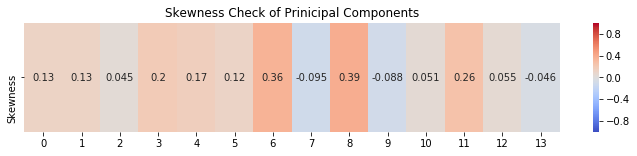

In [27]:
plt.figure(figsize=(12,2))
sns.heatmap(pd.DataFrame((x.skew())).T, annot=True, xticklabels=x.columns, yticklabels=['Skewness'], cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Skewness Check of Prinicipal Components')
plt.show()

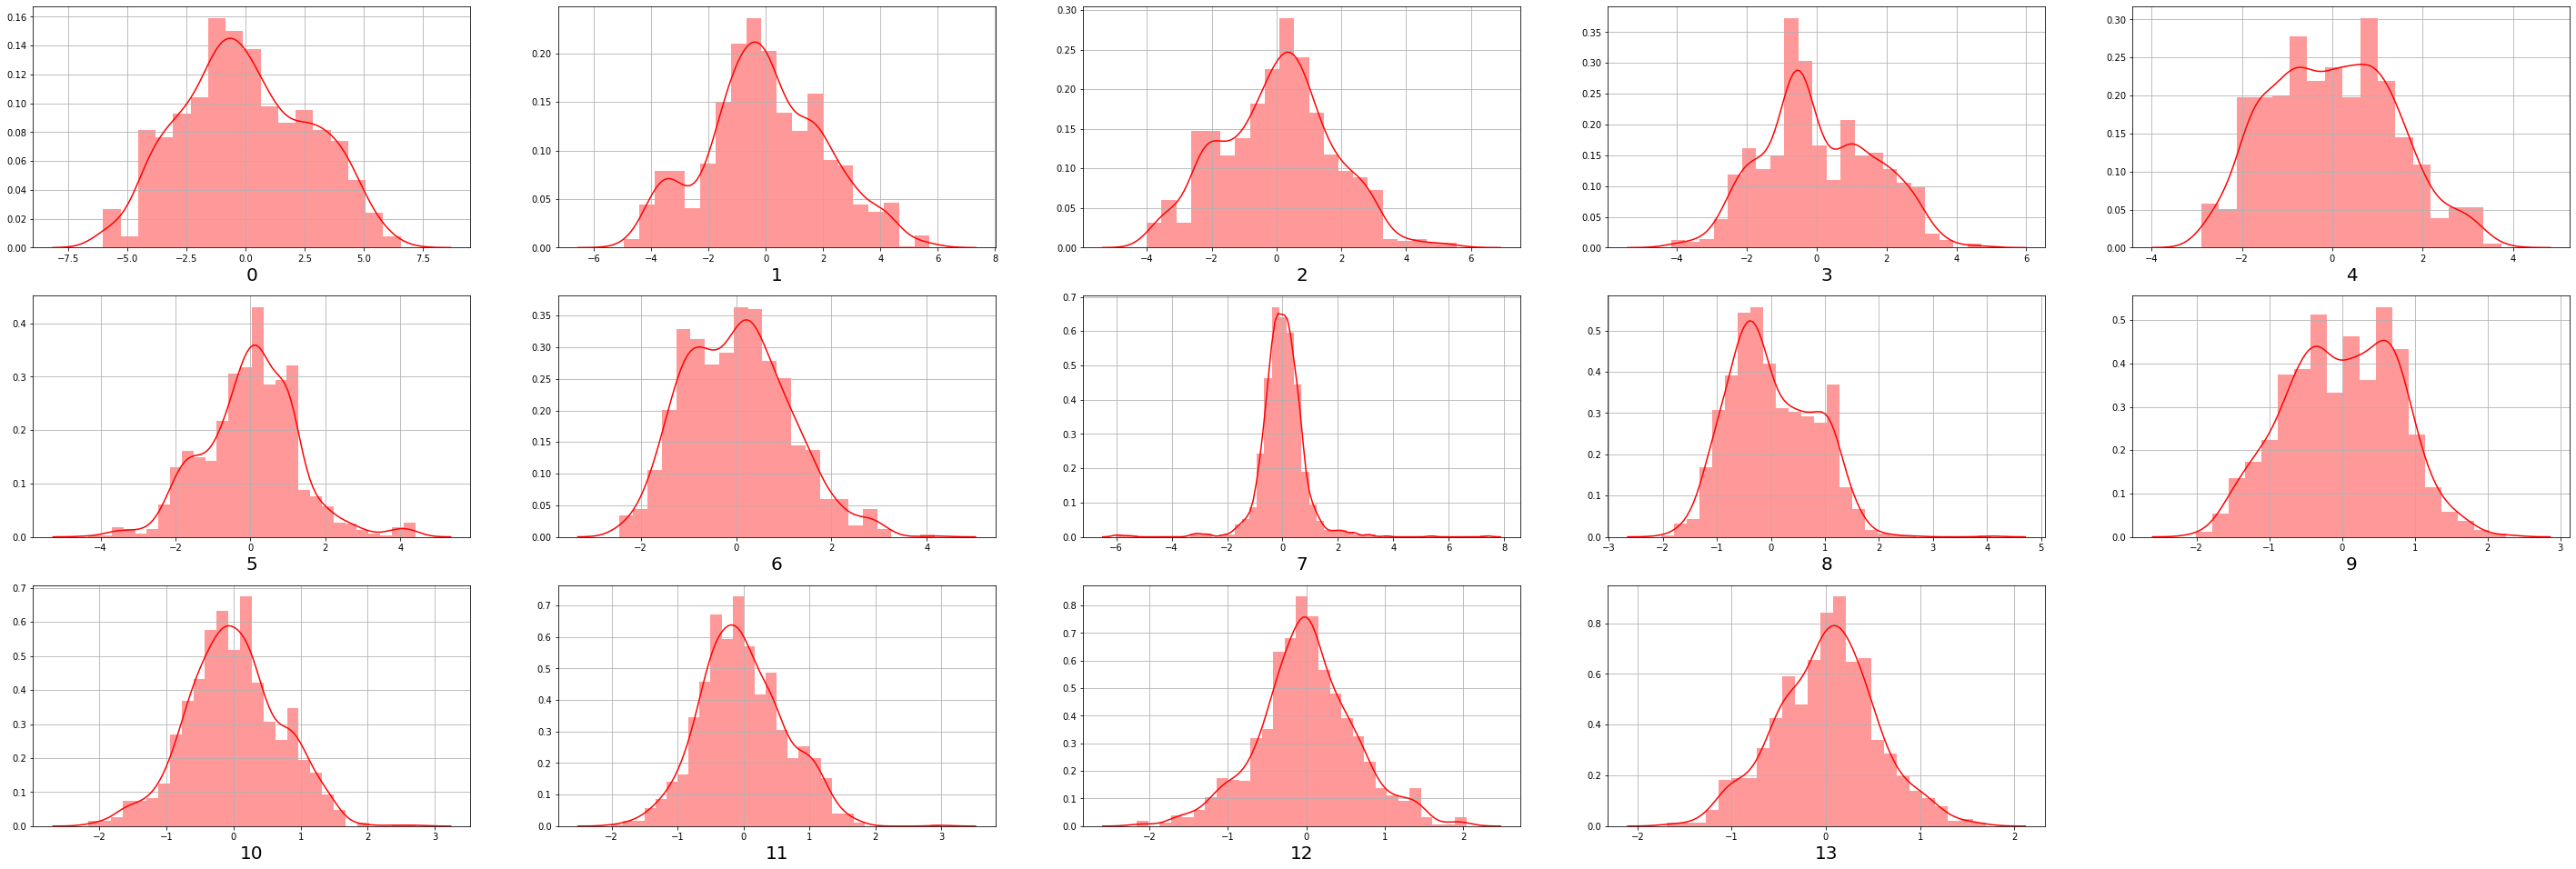

In [28]:
plt.figure(figsize=(50,40))
for i in enumerate(xtrain.columns):
    plt.subplot(7,5,i[0]+1)
    sns.distplot(xtrain[i[1]],color='r')
    plt.xlabel(i[1], fontsize=20)
    plt.grid()

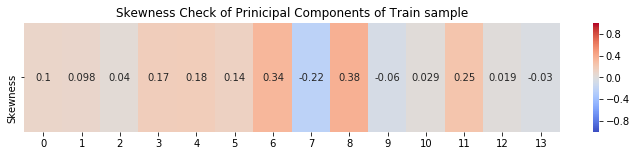

In [29]:
plt.figure(figsize=(12,2))
sns.heatmap(pd.DataFrame((xtrain.skew())).T, annot=True, xticklabels=xtrain.columns, yticklabels=['Skewness'], cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Skewness Check of Prinicipal Components of Train sample')
plt.show()

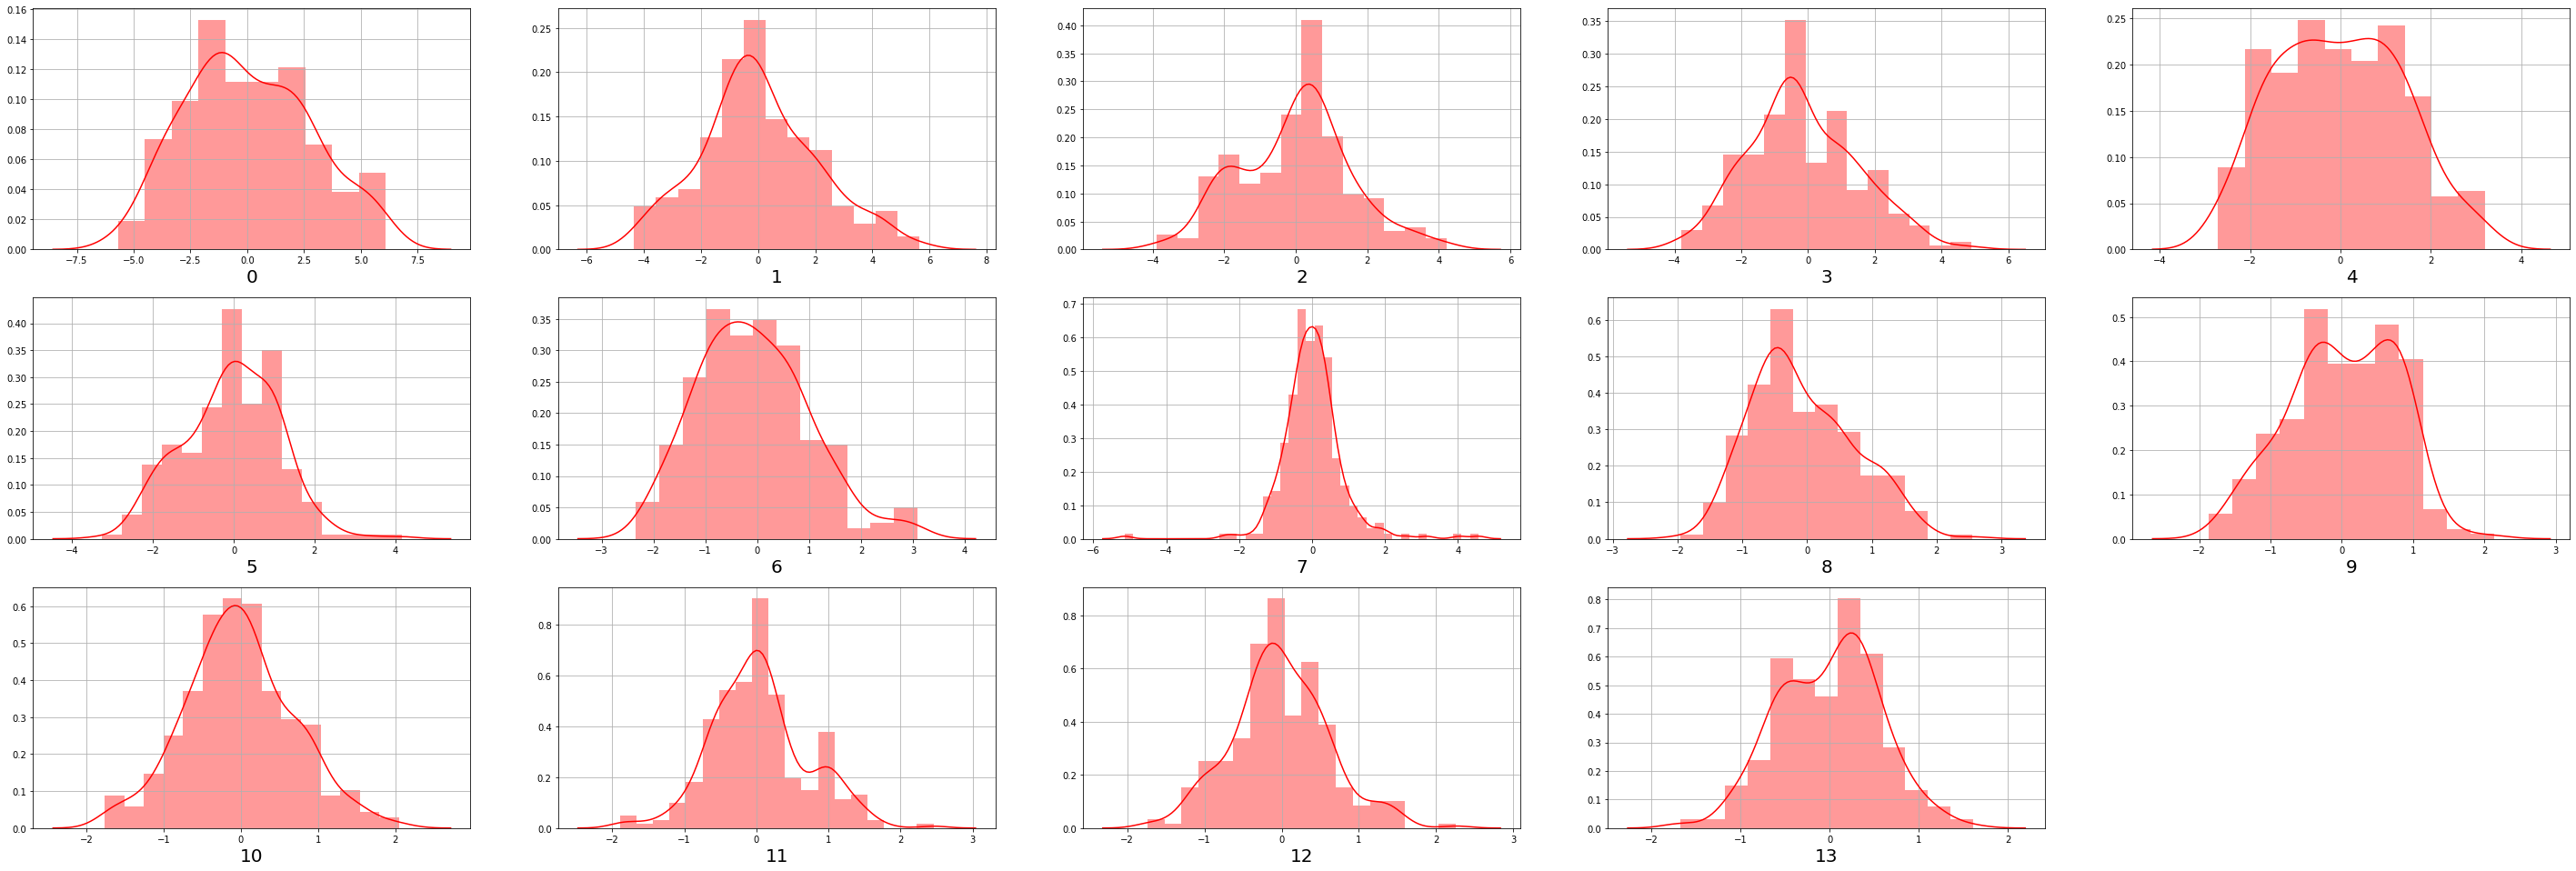

In [30]:
plt.figure(figsize=(50,40))
for i in enumerate(xtest.columns):
    plt.subplot(7,5,i[0]+1)
    sns.distplot(xtest[i[1]],color='r')
    plt.xlabel(i[1], fontsize=20)
    plt.grid()

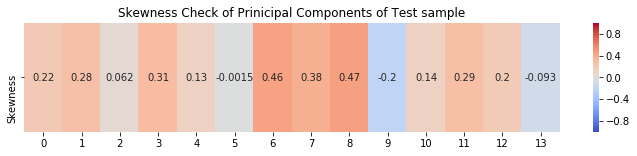

In [31]:
plt.figure(figsize=(12,2))
sns.heatmap(pd.DataFrame((xtest.skew())).T, annot=True, xticklabels=xtest.columns, yticklabels=['Skewness'], cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Skewness Check of Prinicipal Components of Test sample')
plt.show()

**From the above graphs, we can conclude that the data and its samples are normal, thus we can proceed to parametric methods for their statistical analysis, i.e, Anova in our case, for testing predictor significance and 1 sample t-test for testing train and test sample.**

## Analysing Significance of Predictors

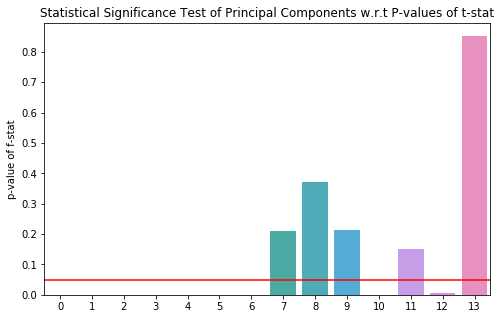

In [32]:
from sklearn.feature_selection import SelectKBest, f_classif

## HYPOTHESIS
# H0: Insignificant Features
# Ha: Significant Features

skb = SelectKBest(f_classif, k='all')
skb.fit_transform(x,y)

pca_pvals = pd.DataFrame(skb.pvalues_, index=x.columns, columns=['p-value of f-stat'])

plt.figure(figsize=(8,5))
sns.barplot(y=pca_pvals['p-value of f-stat'], x=pca_pvals.index)
plt.title('Statistical Significance Test of Principal Components w.r.t P-values of t-stat')
plt.axhline(y=0.05, color='r')
plt.show()

**As we can see, for the 7th, 9th and 11th principal components we Fail to Reject Null Hypothesis, thus, infering them to be statistically insignificant features to determine variance in the target.**

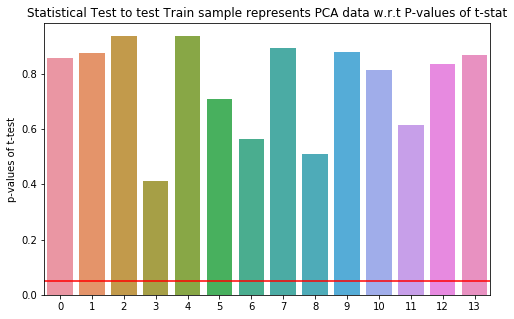

In [33]:
## HYPOTHESIS
# H0: train sample represents original data
# Ha: train sample varies from original data

pca_train_pvals = pd.DataFrame(st.ttest_1samp(xtrain, x.mean())[1], index=xtrain.columns, columns=['p-values of t-test'])

plt.figure(figsize=(8,5))
sns.barplot(y=pca_train_pvals['p-values of t-test'], x=pca_train_pvals.index)
plt.title('Statistical Test to test Train sample represents PCA data w.r.t P-values of t-stat')
plt.axhline(y=0.05, color='r')
plt.show()

**As we can see, for all the principal components we Fail to Reject Null Hypothesis, thus, infering the train sample to be representing the original data.**

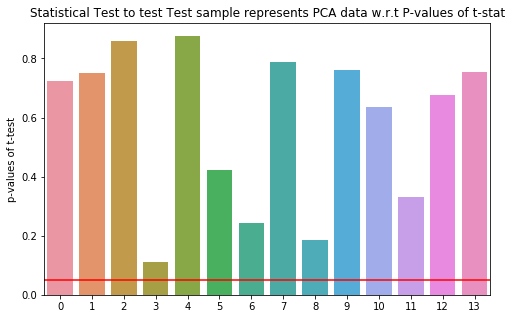

In [34]:
## HYPOTHESIS
# H0: train sample represents original data
# Ha: train sample varies from original data

pca_test_pvals = pd.DataFrame(st.ttest_1samp(xtest, x.mean())[1], index=xtrain.columns, columns=['p-values of t-test'])

plt.figure(figsize=(8,5))
sns.barplot(y=pca_test_pvals['p-values of t-test'], x=pca_test_pvals.index)
plt.title('Statistical Test to test Test sample represents PCA data w.r.t P-values of t-stat')
plt.axhline(y=0.05, color='r')
plt.show()

**As we can see, for all the principal components we Fail to Reject Null Hypothesis, thus, infering the test sample to be representing the original data.**